# Visualisation en donut des responsabilités de l'archiviste au sein de projet numérique

Ce notebook contient le code utilisé pour générer la visualisation sous forme de donut de la place de l'archiviste au sein de projet numérique dans les institutions cantonales d'archives. Toutes les versions du code sont conservées dans ce notebook. La visualisation est disponible contextualisé dans le rapport de l'étude.

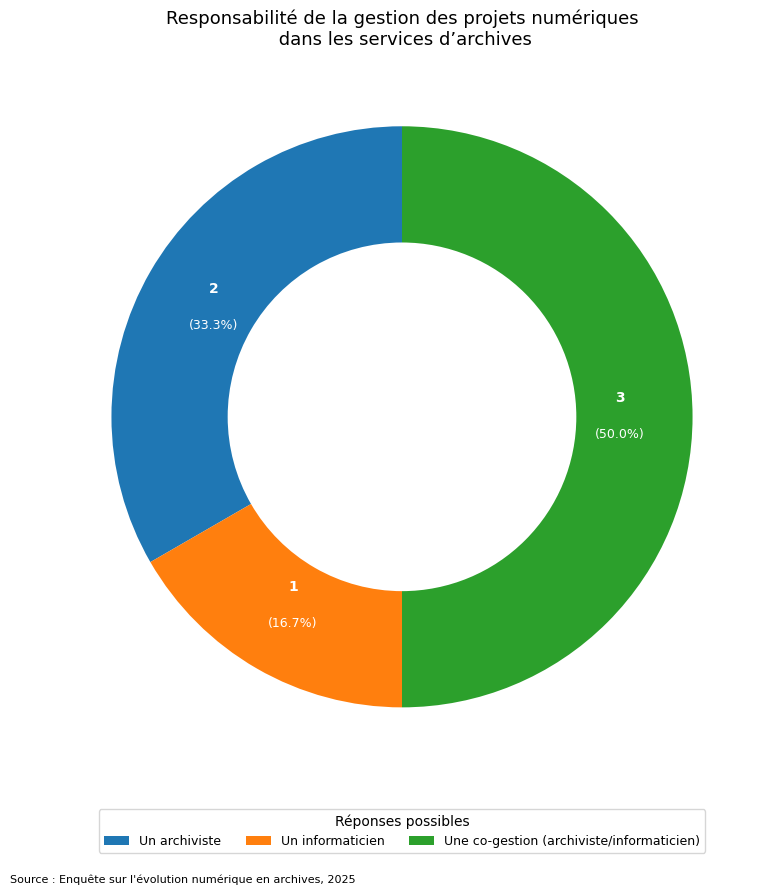

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import numpy as np

# Charger les données
file_path = "Gestion_projet_archives.xlsx"  # Adapte le chemin si nécessaire
df = pd.read_excel(file_path, sheet_name="Feuil1")

# Nom de la colonne cible
col = "Dans votre service d’archives, la gestion des projets numériques est de la responsabilité de quel profil professionnel ?"
df[col] = df[col].str.strip()  # Nettoyage des espaces

# Ordre des modalités attendues
ordre = [
    "Un archiviste",
    "Un informaticien",
    "Une co-gestion (archiviste/informaticien)"
    
]

# Comptage des réponses
counts = df[col].value_counts().reindex(ordre, fill_value=0)
counts_present = counts[counts > 0]

# Palette de couleurs variées
palette_diverse = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
colors_present = [color for c, color in zip(counts, palette_diverse) if c > 0]

# Tracer le donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(
    counts_present,
    labels=None,
    colors=colors_present,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Ajouter les étiquettes (valeurs + pourcentages)
total = counts.sum()
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    radius = 0.75
    x = np.cos(np.deg2rad(angle)) * radius
    y = np.sin(np.deg2rad(angle)) * radius
    valeur = counts_present.iloc[i]
    pct = valeur / total * 100

    ax.text(x, y + 0.04, f"{valeur}", ha='center', va='bottom', color='white', fontsize=10, weight='bold')
    ax.text(x, y - 0.04, f"({pct:.1f}%)", ha='center', va='top', color='white', fontsize=9)

# Légende sous le donut
fig.legend(
    handles=[Patch(facecolor=color, label=label) for color, label in zip(palette_diverse, ordre)],
    title="Réponses possibles",
    loc="lower center",
    ncol=3,
    fontsize=9,
    bbox_to_anchor=(0.5, -0.08)
)

# Titre et source bien séparée
ax.set_title("Responsabilité de la gestion des projets numériques\n dans les services d’archives", fontsize=13)
plt.figtext(0.01, -0.11, "Source : Enquête sur l'évolution numérique en archives, 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()


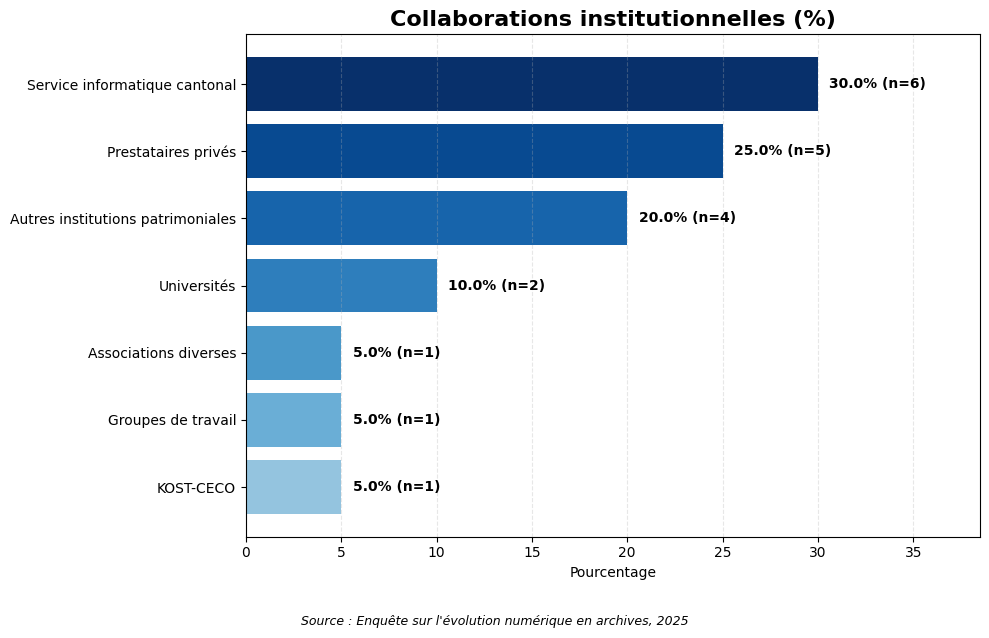

In [2]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_collaborations_barh(
    file_path="Q16_Collaboration.xlsx",
    sheet_name="Feuil1",
    title="Collaborations institutionnelles (%)",
    source="Source : Enquête sur l'évolution numérique en archives, 2025",
    show_counts=False,               # Afficher n en plus du %
    save_png=None                    # e.g. "collaborations_barh.png"
):
    # 1) Charger les données
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.loc[:, ~df.columns.astype(str).str.contains("^unnamed", case=False)]
    target_col = df.columns[0]
    s = df[target_col].dropna().astype(str).str.strip()
    
    # 2) Comptage + pourcentages
    counts = s.value_counts(dropna=False).reset_index()
    counts.columns = ["Institution", "Occurrences"]
    counts["Pourcentage"] = counts["Occurrences"] / counts["Occurrences"].sum() * 100
    
    # 3) Tri ordre croissant
    counts = counts.sort_values("Pourcentage", ascending=True).reset_index(drop=True)
    
    # 4) Palette dégradée
    colors = plt.cm.Blues(np.linspace(0.4, 1, len(counts)))
    
    # 5) Tracé
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(counts["Institution"], counts["Pourcentage"], color=colors, edgecolor="none")
    
    # 6) Annotations
    pad = counts["Pourcentage"].max() * 0.02
    for bar, pct, n in zip(bars, counts["Pourcentage"], counts["Occurrences"]):
        label = f"{pct:.1f}%"
        if show_counts:
            label += f" (n={n})"
        ax.text(bar.get_width() + pad,
                bar.get_y() + bar.get_height()/2,
                label,
                va="center", ha="left", fontsize=10, weight="bold")
    
    # 7) Habillage
    ax.set_title(title, fontsize=16, weight="bold")
    ax.set_xlabel("Pourcentage")
    ax.set_xlim(0, counts["Pourcentage"].max() + counts["Pourcentage"].max()*0.25 + 1)
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    
    # 8) Ajouter la source sous la figure
    if source:
        plt.figtext(0.5, -0.05, source, wrap=True, ha="center", fontsize=9, style="italic")
    
    plt.tight_layout()
    
    # 9) Enregistrement optionnel
    if save_png:
        plt.savefig(save_png, dpi=300, bbox_inches="tight")
    
    plt.show()
    return counts

# --- Utilisation ---
_ = plot_collaborations_barh(
    file_path="Q16_Collaboration.xlsx",
    sheet_name="Feuil1",
    show_counts=True,
    save_png=None
)


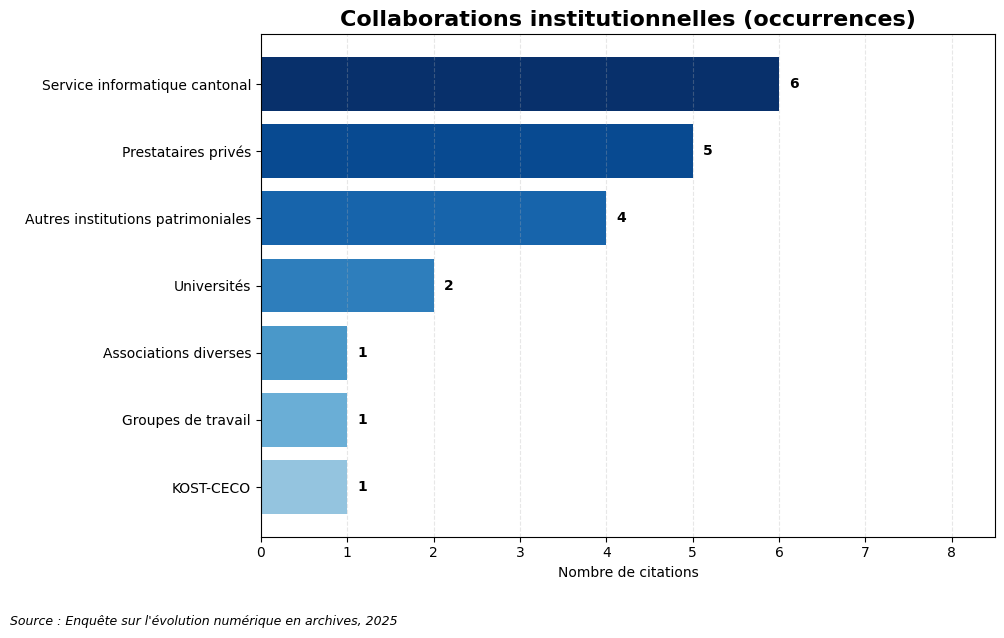

In [6]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_collaborations_barh_counts(
    file_path="Q16_Collaboration.xlsx",
    sheet_name="Feuil1",
    title="Collaborations institutionnelles (occurrences)",
    source="Source : Enquête sur l'évolution numérique en archives, 2025",
    save_png=None                    # e.g. "collaborations_barh_counts.png"
):
    # 1) Charger les données
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.loc[:, ~df.columns.astype(str).str.contains("^unnamed", case=False)]
    target_col = df.columns[0]
    s = df[target_col].dropna().astype(str).str.strip()
    
    # 2) Comptage brut
    counts = s.value_counts(dropna=False).reset_index()
    counts.columns = ["Institution", "Occurrences"]
    
    # 3) Tri ordre croissant
    counts = counts.sort_values("Occurrences", ascending=True).reset_index(drop=True)
    
    # 4) Palette dégradée (bleu clair -> bleu foncé)
    colors = plt.cm.Blues(np.linspace(0.4, 1, len(counts)))
    
    # 5) Tracé
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(counts["Institution"], counts["Occurrences"], color=colors, edgecolor="none")
    
    # 6) Annotations (n seulement)
    pad = counts["Occurrences"].max() * 0.02
    for bar, n in zip(bars, counts["Occurrences"]):
        ax.text(bar.get_width() + pad,
                bar.get_y() + bar.get_height()/2,
                f"{n}",
                va="center", ha="left", fontsize=10, weight="bold")
    
    # 7) Habillage
    ax.set_title(title, fontsize=16, weight="bold")
    ax.set_xlabel("Nombre de citations")
    ax.set_xlim(0, counts["Occurrences"].max() + counts["Occurrences"].max()*0.25 + 1)
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    
    # 8) Source en bas à gauche
    if source:
        plt.figtext(0.0, -0.05, source, wrap=True, ha="left", fontsize=9, style="italic")
    
    plt.tight_layout()
    
    # 9) Enregistrement optionnel
    if save_png:
        plt.savefig(save_png, dpi=300, bbox_inches="tight")
    
    plt.show()
    return counts

# --- Utilisation ---
_ = plot_collaborations_barh_counts(
    file_path="Q16_Collaboration.xlsx",
    sheet_name="Feuil1",
    save_png=None
)

